# TP5 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images -- À la découverte des images RGB (Red Green Blue)

**But du TP** :
* manipuler les composantes Rouge, Vert et Bleu des images
* realisation de filtrages par canaux

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

**Astuces**:
* Essayez de faire fonctionner vos algorithmes sur n'importe quelle taille d'image.
* N'hésitez pas à créer des fonctions pour chaque partie des traitements.

In [ ]:
# OS setup
#!cat /etc/os-release
!apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

Selecting previously unselected package tree.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
Cloning into 'tp-m1-ts'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 78 (delta 1), reused 0 (delta 0), pack-reused 58
Receiving objects: 100% (78/78), 4.11 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np

# Rehaussement par Laplacien

1. Charger l'image tp-m1-ts/tp5/peppers.png et afficher la.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/peppers.png?ref_type=heads)

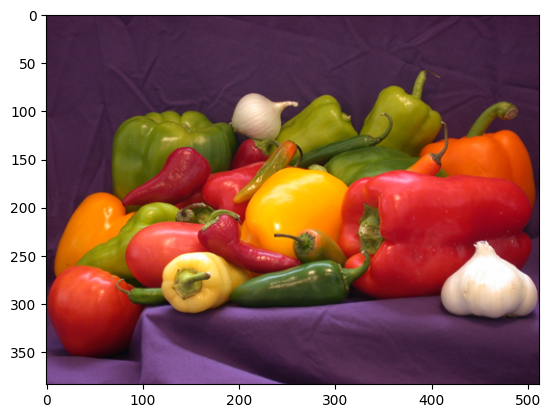

In [ ]:
img = plt.imread('/content/tp-m1-ts/tp5/peppers.png')

# Afficher l'image
plt.imshow(img)
plt.show()

2. Créer le masque correspondant à l'opérateur Laplacien avec un centre négatif. Filtrer l'image en utilisant la fonction de convolution [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) sur chaque composante de l'image. Afficher le résultat.

In [ ]:
def apply_laplacian_filter(image):
    # Créer le masque Laplacien avec un centre négatif
    laplacian_mask = np.array([[0, 1, 0],
                               [1, -4, 1],
                               [0, 1, 0]])

    # Appliquer la convolution sur chaque composante de l'image avec le masque Laplacien
    r = img[:,:,0]
    v = img[:,:,1]
    b = img[:,:,2]
    rmasque = sig.convolve2d(r, laplacian_mask, mode='same')
    vmasque = sig.convolve2d(v, laplacian_mask, mode='same')
    bmasque= sig.convolve2d(b, laplacian_mask, mode='same')

    #combiner les tableaux filtres
    imgfiltre = np.dstack((rmasque, vmasque, bmasque))

    return imgfiltre



(-0.5, 511.5, 383.5, -0.5)

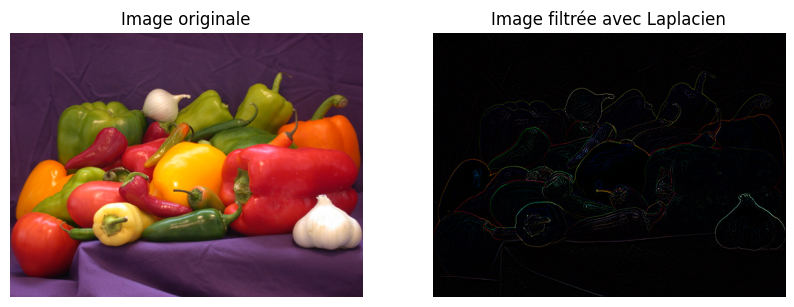

In [ ]:
filtered_image = apply_laplacian_filter(img)

# Afficher l'image originale et l'image filtrée
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Image originale')
axes[0].axis('off')
axes[1].imshow(filtered_image, cmap='gray')
axes[1].set_title('Image filtrée avec Laplacien')
axes[1].axis('off')

3. À partir de l'image originale et l'image obtenue en 2), comment pouvons-nous obtenir une image rehaussée ? Appliquer cette méthode. Afficher le résultat et commenter.

Pour obtenir une image rehaussée à partir de l'image filtrée avec l'opérateur Laplacien, nous pouvons ajouter la différence entre l'image originale et l'image filtrée à l'image originale elle-même. Cela aura pour effet de renforcer les contours et les détails de l'image.

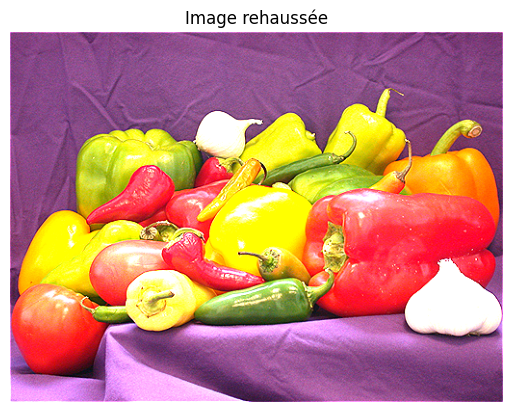

In [ ]:
img_rehau = img + (img - filtered_image)

# Afficher l'image rehaussée
plt.imshow(img_rehau)
plt.title('Image rehaussée')
plt.axis('off')
plt.show()

Vos commentaires...

# Manipulation des composantes RGB

1. Affichage des composantes de l'image de la voiture : tp-m1-ts/tp5/2cv.jpg

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/2cv.jpg?ref_type=heads)

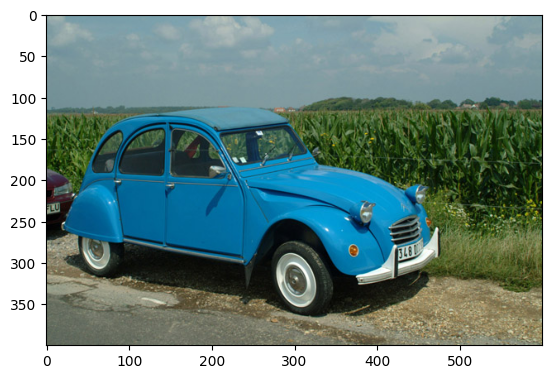

In [ ]:
voiture = plt.imread('/content/tp-m1-ts/tp5/2cv.jpg')

# Afficher l'image
plt.imshow(voiture)
plt.show()

a. Construire l'image en intensité de la composante bleue uniquement. Pour cela :
* créer une image img_bleue de la même taille que img et contenant que des 0,
* copier les valeurs de la composante bleue de img dans img_bleue,
* afficher l'image : que remarquez-vous ?
![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_5.png?ref_type=heads)

In [ ]:
r = voiture[:,:,0]
v = voiture[:,:,1]
b = voiture[:,:,2]

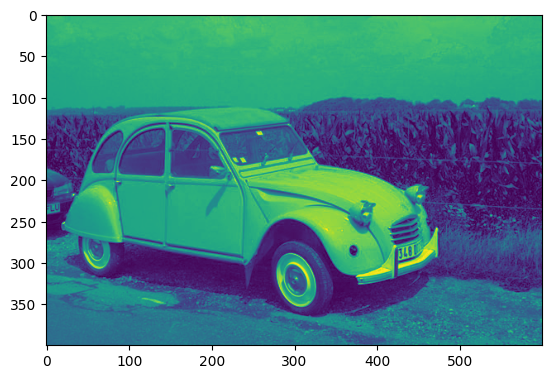

In [ ]:
# Créer voiture_bleu de la même taille que img et contenant que des 0
voiture_bleu = np.zeros_like(b)
# Copier les valeurs de la composante bleue de img dans voiture_bleu
voiture_bleu[:,:] = b

# Afficher l'image bleu
plt.imshow(voiture_bleu)
plt.show()

b. Construire de même l'image de la composante verte et l'image de la composante rouge.


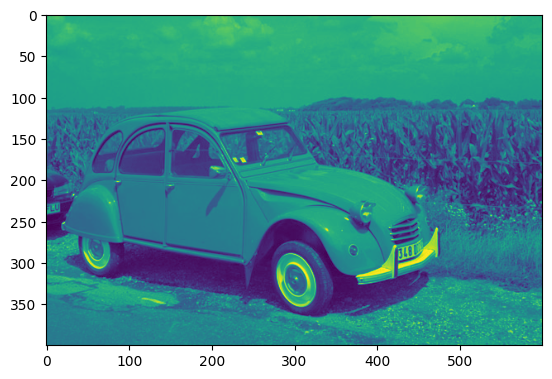

In [ ]:
# Créer voiture_vert de la même taille que img et contenant que des 0
voiture_vert = np.zeros_like(v)
# Copier les valeurs de la composante bleue de img dans voiture_vert
voiture_vert[:,:] = v

# Afficher l'image verte
plt.imshow(voiture_vert)
plt.show()

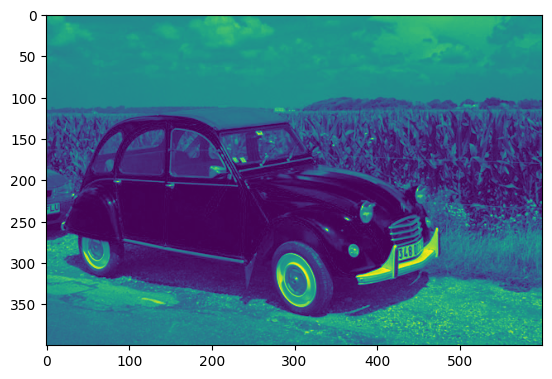

In [ ]:
# Créer voiture_rouge de la même taille que img et contenant que des 0
voiture_rouge = np.zeros_like(v)
# Copier les valeurs de la composante bleue de img dans voiture_rouge
voiture_rouge[:,:] = r

# Afficher l'image verte
plt.imshow(voiture_rouge)
plt.show()


c. Commenter l'évolution de l'intensité des pixels correspondant à la carrosserie de la voiture.

*Vos commentaires...*

2. Filtrage en fonction des composantes

a. Construire l'image filtrée où ne sont retenus que les pixels dont l'intensité en bleu est supérieure à un seuil donné :

       dimensions=np.shape(img)
       seuil = 200
       masque = (img[:,:,2]> seuil)
       imgf = np.zeros(dimensions,dtype=np.uint8)
       imgf[masque,0] = img[masque,0]
       imgf[masque,1] = img[masque,1]
       imgf[masque,2] = img[masque,2]

Donner une valeur de la variable seuil sur la composante bleue qui permet d'obtenir la carrosserie complète de la voiture tout en éliminant un maximum des autres pixels de l'image. Identifier les principales zones ayant été retenues après filtrage et expliquer la raison de leur présence à l'image.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_8.png?ref_type=heads)

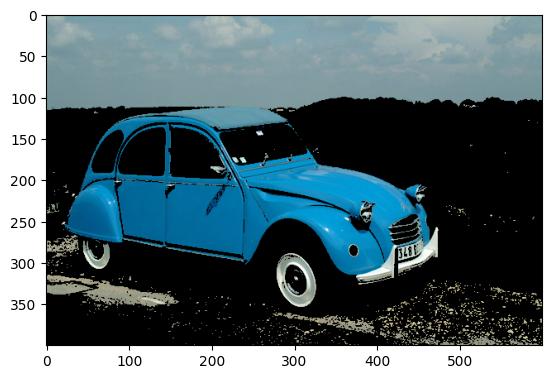

In [ ]:
dimensions = np.shape(voiture)
seuil = 120
masque = (voiture[:,:,2]> seuil)
imgf = np.zeros(dimensions,dtype=np.uint8)
imgf[masque,0] = voiture[masque,0]
imgf[masque,1] = voiture[masque,1]
imgf[masque,2] = voiture[masque,2]

plt.imshow(imgf)
plt.show()

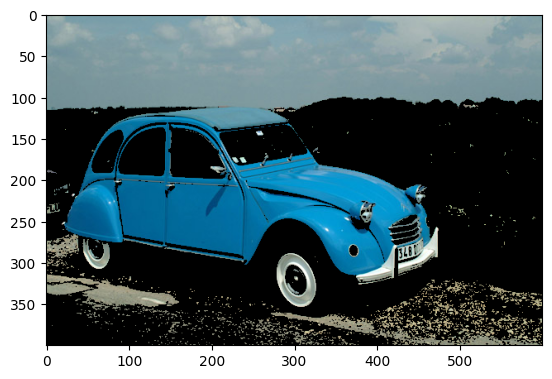

In [ ]:
dimensions = np.shape(voiture)
seuil = 110
masque = (voiture[:,:,2]> seuil)
imgf2 = np.zeros(dimensions,dtype=np.uint8)
imgf2[masque,0] = voiture[masque,0]
imgf2[masque,1] = voiture[masque,1]
imgf2[masque,2] = voiture[masque,2]

plt.imshow(imgf2)
plt.show()

b. Sur le même principe, proposer un seuillage sur la composante rouge pour essayer de conserver l'intégralité de la carrosserie de la voiture tout en éliminant un maximum de pixels. Produire le même type d'analyse que pour le résultat précédent.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_9.png?ref_type=heads)

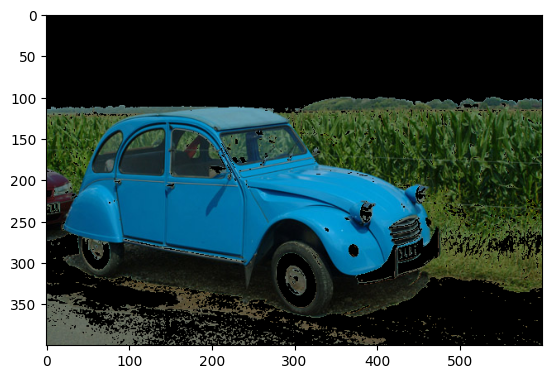

In [ ]:
dimensions = np.shape(voiture)
seuil = 110
masque = (voiture[:,:,0]< seuil)
imgf3 = np.zeros(dimensions,dtype=np.uint8)
imgf3[masque,0] = voiture[masque,0]
imgf3[masque,1] = voiture[masque,1]
imgf3[masque,2] = voiture[masque,2]

plt.imshow(imgf3)
plt.show()

c. Proposer une combinaison des deux seuils précédents (sur la composante bleue et sur la composante rouge) pour cerner au mieux la carrosserie. Les seuils permettent ici de déterminer une région de l'image. Nous avons « masqué » les pixels n'appartenant pas à la voiture. D'une manière générale, en traitement d'image, un « masque » désigne une image qui identifie un sous- ensemble des pixels d'une image de départ.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_10.png?ref_type=heads)

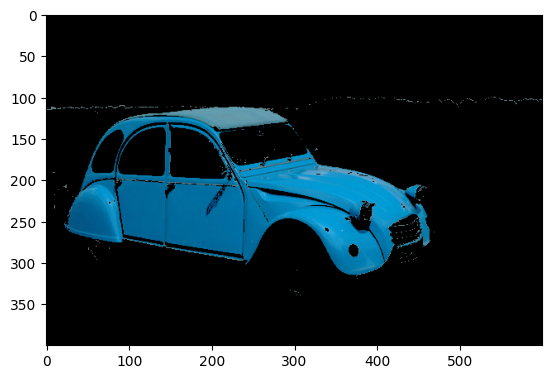

In [ ]:
seuil_R = 110
seuil_B = 120
masque = (voiture[:,:,0] < seuil_R) & (voiture[:,:,2] > seuil_B)
imgf5 = np.zeros_like(voiture)
imgf5[masque] = voiture[masque]
plt.imshow(imgf5)
plt.show()


d. À l'aide de ces informations, intervertissez les valeurs des composantes verte et bleue pour transformer la couleur de la voiture.

![Extrait de Lena](https://gitlab.com/jeromefarinas/tp-m1-ts/-/raw/main/tp5/resultat_attendu/Figure_11.png?ref_type=heads)

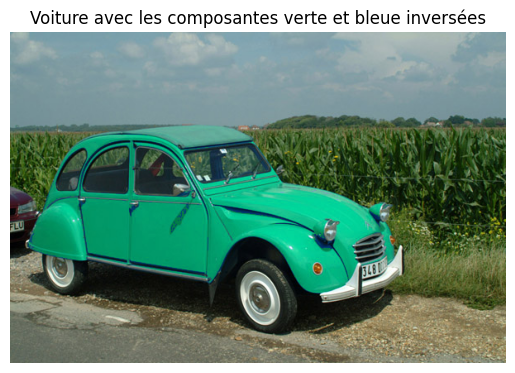

In [ ]:
# Inverser les valeurs des composantes verte et bleue
voiture_inverse = imgf5.copy()  # Créer une copie de l'image de la voiture pour éviter de modifier l'original
voiture_inverse[:, :, 1], voiture_inverse[:, :, 2] = voiture_inverse[:, :, 2], voiture_inverse[:, :, 1].copy()

# Superposer l'image inversée à l'image originale pour changer la couleur de la voiture en vert
img_couleur_verte = voiture.copy()  # Créer une copie de l'image originale
# Remplacer les pixels de la carrosserie de l'image originale par ceux de l'image inversée
img_couleur_verte[imgf5 != 0] = voiture_inverse[imgf5 != 0]

# Afficher l'image de la voiture avec les composantes verte et bleue inversées
plt.imshow(img_couleur_verte)
plt.title("Voiture avec les composantes verte et bleue inversées")
plt.axis('off')
plt.show()

#Conversion d’image

1. Image en niveaux de gris et image binaire

a. Convertir l'image de départ en niveaux de gris et afficher le résultat obtenu, en utilisant la palette graphique composée de 256 niveaux de gris.

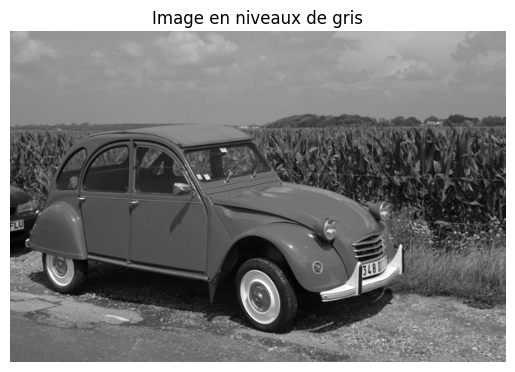

In [ ]:
# Convertir l'image en niveaux de gris
def rgb_to_gray(image):
    return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

image_gray = rgb_to_gray(voiture)

# Afficher l'image en niveaux de gris
plt.imshow(image_gray, cmap='gray')
plt.title("Image en niveaux de gris")
plt.axis('off')
plt.show()


b. Binariser l'image en niveaux de gris avec le seuil par défaut(128). Afficher les résultats obtenus.

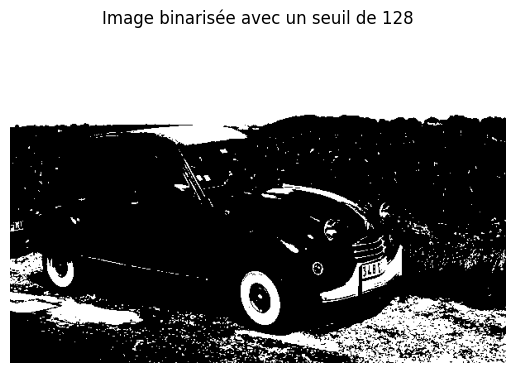

In [ ]:
# Seuillage pour binariser l'image en niveaux de gris
def binarize_gray_image(image_gray, seuil=128):
    image_binarized = np.where(image_gray >= seuil, 255, 0)
    return image_binarized

# Binariser l'image en niveaux de gris avec le seuil par défaut
image_binarized = binarize_gray_image(image_gray)

# Afficher l'image binarisée
plt.imshow(image_binarized, cmap='gray', vmin=0, vmax=255)
plt.title("Image binarisée avec un seuil de 128")
plt.axis('off')
plt.show()

2. Histogramme

a. Calculer l'histogramme de l'image en niveaux de gris.Afficher le résultat.

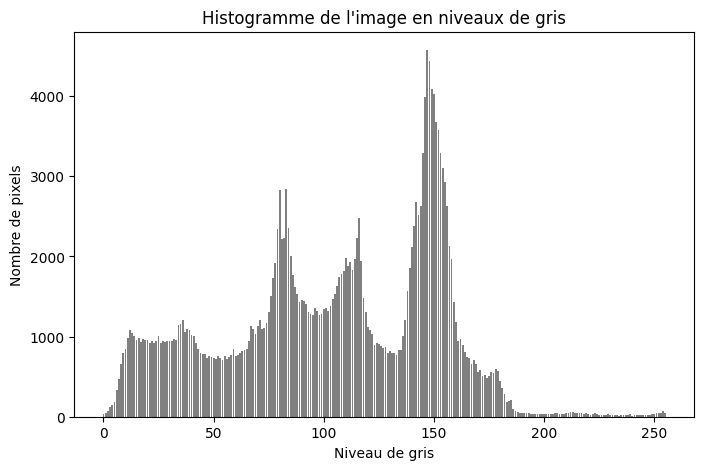

In [ ]:
# Calculer l'histogramme de l'image en niveaux de gris
histogram = np.histogram(image_gray, bins=256, range=(0, 255))[0]

# Afficher l'histogramme
plt.figure(figsize=(8, 5))
plt.bar(np.arange(256), histogram, color='gray')
plt.title("Histogramme de l'image en niveaux de gris")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")
plt.show()

b. À l'aide de l'histogramme, est-il possible de binariser l'image en niveaux de gris de manière plus intelligente (afin que l'image binaire soit plus lisible) ?

In [ ]:
'''
en utilisant l'histogramme de l'image en niveaux de gris, il est possible de choisir un seuil de binarisation plus intelligent pour rendre l'image binaire plus lisible. En observant l'histogramme, nous pouvons voir la répartition des niveaux de gris dans l'image. Si l'histogramme présente deux pics distincts, cela signifie généralement qu'il y a deux groupes principaux de niveaux de gris dans l'image.

Pour rendre l'image binaire plus lisible, nous pouvons choisir un seuil qui divise les deux pics de manière équilibrée, de sorte que les pixels appartenant à chaque groupe principal soient bien séparés. Cela permettra d'obtenir une image binaire avec un contraste plus élevé entre les objets d'intérêt et l'arrière-plan.

En résumé, en analysant l'histogramme de l'image en niveaux de gris, nous pouvons choisir un seuil de binarisation plus intelligent pour améliorer la lisibilité de l'image binaire.
'''